# Police Shootings in US - Data visualization with pandas and Matplotlib (The Washington Post's Police shootings database 2015-2017)

"In 2015, The Washington Post began to log [every fatal shooting](https://www.washingtonpost.com/graphics/national/police-shootings-year-end/) by an on-duty police officer in the United States. In that time there have been [more than 5,000 such shootings](https://www.washingtonpost.com/nation/2019/08/09/what-weve-learned-about-police-shootings-years-after-ferguson/?arc404=true) recorded by The Post. After [Michael Brown, an unarmed Black man, was killed](https://www.washingtonpost.com/policeshootings/) in 2014 by police in Ferguson, Mo., a Post investigation found that the [FBI undercounted fatal police shootings](https://www.washingtonpost.com/news/post-nation/wp/2014/09/08/how-many-police-shootings-a-year-no-one-knows/) by more than half. This is because reporting by police departments is voluntary and many departments fail to do so. The Washington Post’s data relies primarily on news accounts, social media postings and police reports. Analysis of more than five years of data reveals that the number and circumstances of fatal shootings and the overall demographics of the victims have remained relatively constant..." [SOURCE: Washington Post Article](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)

[For more information about this story](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)


This dataset has been prepared by The Washington Post (they keep updating it on runtime) with every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.

## ABOUT THE FEATURES

The Data contains data about each fatal shooting in CSV format. The file can be downloaded at this URL. Each row has the following variables:

- **id:** a unique identifier for each victim
- **name:** the name of the victim
- **date:** the date of the fatal shooting in YYYY-MM-DD format
- **manner_of_death:** shot, shot and Tasered
- **armed:** indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    - undetermined: it is not known whether or not the victim had a weapon
    - unknown: the victim was armed, but it is not known what the object was
    - unarmed: the victim was not armed
- **age:** the age of the victim
- **gender:** the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    - M: Male
    - F: Female
    - None: unknown
- **race:**
    - W: White, non-Hispanic
    - B: Black, non-Hispanic
    - A: Asian
    - N: Native American
    - H: Hispanic
    - O: Other
    - None: unknown
- **city:** the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
- **state:** two-letter postal code abbreviation
- **signs of mental illness:** News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
- **threat_level:** The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.
- **flee:** News reports have indicated the victim was moving away from officers
    - Foot
    - Car
    - Not fleeing

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.
- **body_camera:** News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

[SOURCE](https://github.com/washingtonpost/data-police-shootings)

## Let's start with importing essential libraries.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

Now Let us first try to load and read the PoliceKillings_US dataset.  

## Getting familiar with data

In [2]:
kill = pd.read_csv('PoliceKillings_US.csv', encoding="windows-1252")

In [3]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
kill.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1611,1807,David Klassen,18/08/16,shot,gun,29.0,M,W,Ruidoso,NM,False,other,Not fleeing,False
1733,1945,Joseph S. Schroeder,07/10/16,shot,knife,36.0,M,W,Fort Wayne,IN,False,other,Not fleeing,False
1962,2190,Joshua Martino,04/01/17,shot,gun,18.0,M,W,Brooklyn,NY,False,attack,Foot,False
2170,2416,Luke O. Stewart,13/03/17,shot,vehicle,23.0,M,B,Euclid,OH,False,other,NaN,True
2066,2287,Gerardo Vasquez,06/02/17,shot and Tasered,knife,52.0,M,H,Santa Monica,CA,True,attack,Foot,False
504,626,James Michael Todora,10/07/15,shot,gun,54.0,M,W,Las Vegas,NV,True,attack,Not fleeing,True
1292,1479,Demetrius Dorsey,18/04/16,shot,gun,18.0,M,B,Mableton,GA,False,attack,Not fleeing,False
933,1081,Jonathan Wardlow,12/12/15,shot,Taser,36.0,M,W,Healdton,OK,False,attack,Not fleeing,False
1703,1914,Oddis Bernard Colvin,23/09/16,shot,vehicle,33.0,M,B,Pikesville,MD,False,other,Not fleeing,True
1413,1604,William David Powell,07/06/16,shot,gun,63.0,M,W,Stockbridge,GA,False,attack,Not fleeing,False


In [5]:
kill.shape

(2535, 14)

In [6]:
kill.dropna(inplace=True)

In [7]:
kill.shape

(2254, 14)

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [9]:
kill.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.0,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [10]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

## Box plot of age in both genders separeted by manner of death.

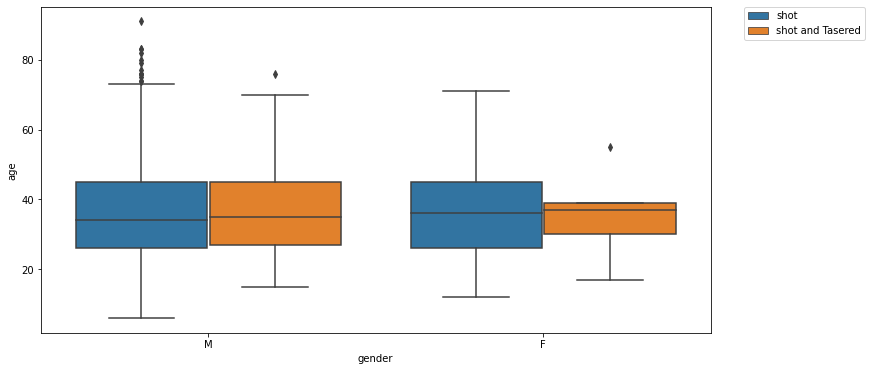

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x = "gender", y = "age", hue = "manner_of_death", data=kill)

plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left", borderaxespad = 0);

## Swarm Plot of age in both genders separeted by manner of death.

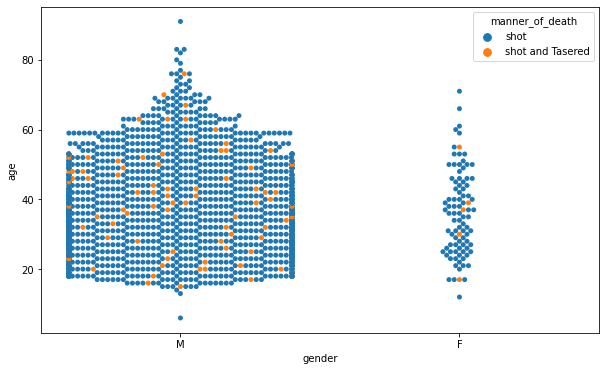

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.swarmplot(x = "gender", y = "age", hue = "manner_of_death", data=kill);

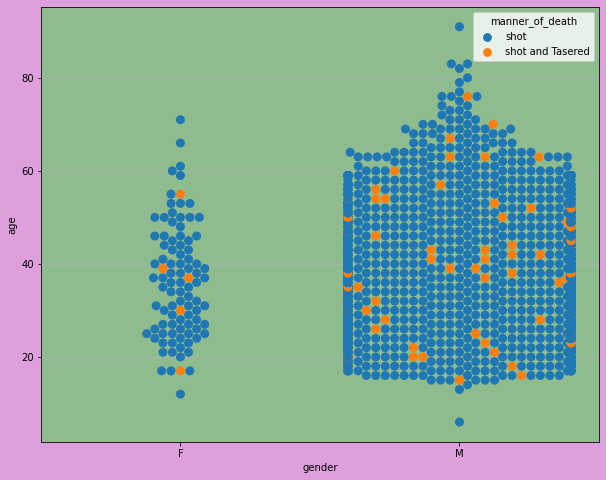

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

sns.swarmplot(x = "gender", y = "age", 
              hue = "manner_of_death", 
              data=kill,
             order = ["F", "M"], 
             size = 9)

ax.yaxis.grid(True)

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

## Violin Plot of age in both genders separeted by manner of death.

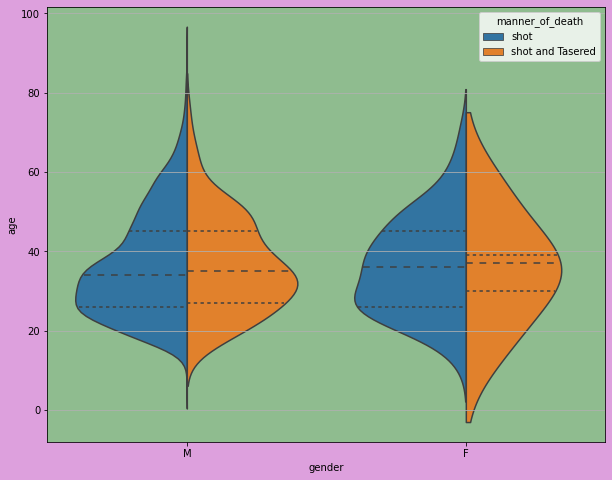

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

sns.violinplot(x = "gender", y = "age", 
              hue = "manner_of_death", 
              data=kill,
             inner = "quartile",
              split=True)

ax.yaxis.grid(True)

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

**if you want to see mean, median and mode values of "age" feature by "gender":**

In [15]:
Means = kill.groupby('gender')['age'].mean()
Medians = kill.groupby('gender')['age'].median()
Modes = kill.groupby('gender')['age'].apply(lambda x: pd.Series.mode(x)[0]) 

print("means", Means, sep ="/", end = "\n\n")
print("medians", Medians, sep ="/", end = "\n\n")
print("modes", Modes, sep ="/", end = "\n\n")

means/gender
F    36.202128
M    36.256481
Name: age, dtype: float64

medians/gender
F    36.0
M    34.0
Name: age, dtype: float64

modes/gender
F    25.0
M    25.0
Name: age, dtype: float64



In [16]:
len(Means)

2

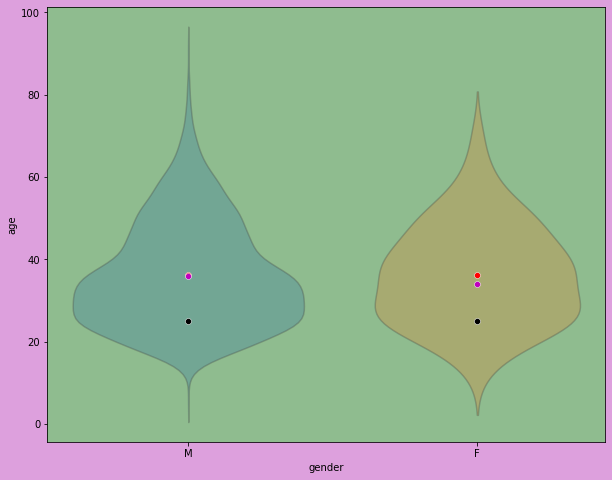

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

sns.violinplot(x = "gender", y = "age", 
              data=kill,
             inner = None)

plt.setp(ax.collections, alpha = .3)

sns.scatterplot(x = range(len(Means)), y = Means, color = "r")
sns.scatterplot(x = range(len(Medians)), y = Medians, color = "m")
sns.scatterplot(x = range(len(Modes)), y = Modes, color = "black")

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

## Bar Plot of 12 Most Dangerous Cities

In [18]:
city_freq = kill["city"].value_counts()[:12]
city_freq

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

In [19]:
city_freq.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield'],
      dtype='object')

In [20]:
city_freq.values

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13], dtype=int64)

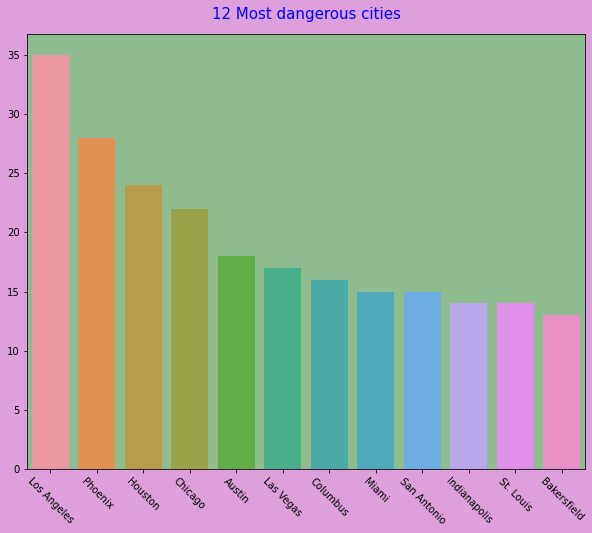

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x = city_freq.index, y = city_freq.values)

ax.set_xticklabels(city_freq.index, rotation = -45)
ax.set_title("12 Most dangerous cities",
            color= "blue",
            fontsize = 15,
            pad = 15)

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

## Bar Plot of 20 Most Dangerous States

In [22]:
sf = kill.state.value_counts()[:20]
sf

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

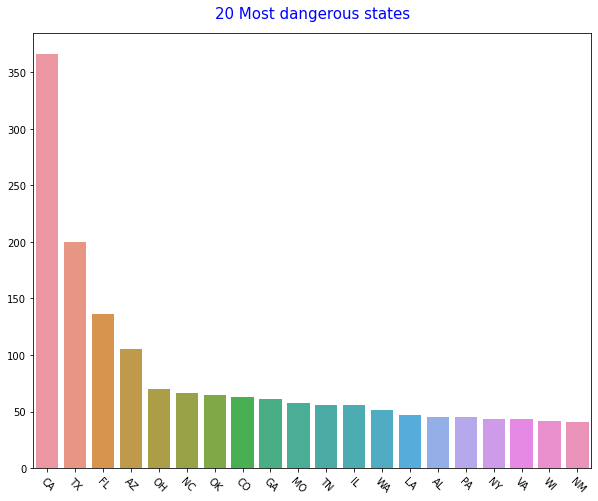

In [23]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x = sf.index, y = sf.values)

ax.set_xticklabels(sf.index, rotation = -45)
ax.set_title("20 Most dangerous states",
            color= "blue",
            fontsize = 15,
            pad = 15);

## Plot of the killed people having mental illness or not

In [24]:
illness = kill["signs_of_mental_illness"].value_counts()
illness

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

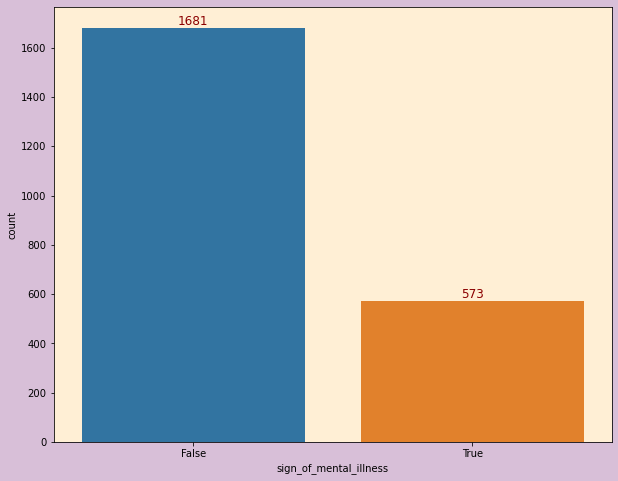

In [25]:
fig, ax = plt.subplots(figsize=(10,8), facecolor="thistle")
ax.set(facecolor  ="papayawhip")

sns.barplot(kill.signs_of_mental_illness.value_counts().index,
           kill.signs_of_mental_illness.value_counts().values)

ax.set_xlabel("sign_of_mental_illness")
ax.set_ylabel("count")

ax.bar_label(ax.containers[0], color = "darkred", size = 12);

## Plot of the number of threat types

In [26]:
tf = kill["threat_level"].value_counts()
tf

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

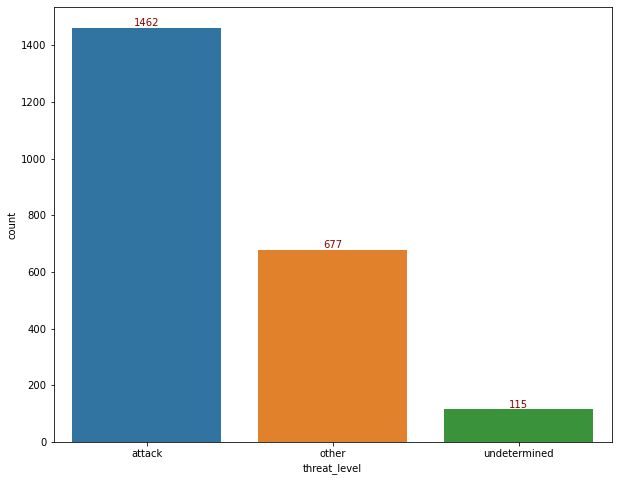

In [27]:
fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(kill.threat_level)

ax.bar_label(ax.containers[0], color = "darkred", size = 10);

In [28]:
pct = kill.threat_level.value_counts(normalize = True) * 100
pct 

attack          64.862467
other           30.035492
undetermined     5.102041
Name: threat_level, dtype: float64

In [29]:
pct.values

array([64.86246673, 30.03549246,  5.10204082])

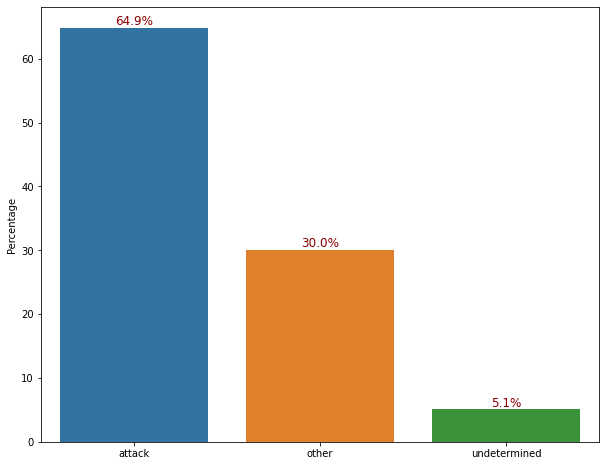

In [30]:
fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x = pct.index,
           y = pct.values)

ax.bar_label(ax.containers[0], color = "darkred", size = 12, fmt='%.1f%%')
ax.set_ylabel("Percentage");

**if we want to transform the values of threat_level categories to 1, 2 and 3 :** 

In [31]:
my_dict = {"attack" :1, "undetermined" : 2, "other" :3}

kill["threat_type"] = kill["threat_level"].map(my_dict)

kill.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,threat_type
911,1056,Ivan Krstic,04/12/15,shot and Tasered,metal stick,47.0,M,W,Mesa,AZ,False,other,Not fleeing,False,3
117,158,Cody Evans,16/02/15,shot,toy weapon,24.0,M,W,Provo,UT,True,attack,Not fleeing,False,1
2260,2518,Brandon Pequeno,20/04/17,shot,vehicle,25.0,M,H,Glendale,AZ,False,other,Car,False,3
2346,2604,Hayden J. Stutz,24/05/17,shot,unarmed,24.0,M,W,Canton,OH,True,attack,Not fleeing,True,1
229,246,Deanne Choate,26/03/15,shot,gun,53.0,F,W,Gardner,KS,False,attack,Not fleeing,False,1
1717,1928,Douglas Marrickus Rainey,30/09/16,shot,gun,32.0,M,B,Campobello,SC,False,attack,Foot,False,1
1022,1196,Rakeem Bentley,15/01/16,shot,gun,24.0,M,B,Southfield,MI,False,attack,Not fleeing,False,1
2020,2247,Dakota A. Lukecart,24/01/17,shot,unarmed,22.0,M,W,Sugar Creek,MO,False,other,Car,False,3
2351,2616,Joseph Zimmerman,26/05/17,shot,toy weapon,34.0,M,W,Tucson,AZ,True,attack,Not fleeing,False,1
1422,1613,Bobby Sanchez,10/06/16,shot,gun,32.0,M,H,Pueblo,CO,False,attack,Foot,False,1


## Plot of the number of flee types

In [32]:
flee_freq = kill.flee.value_counts()
flee_freq

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

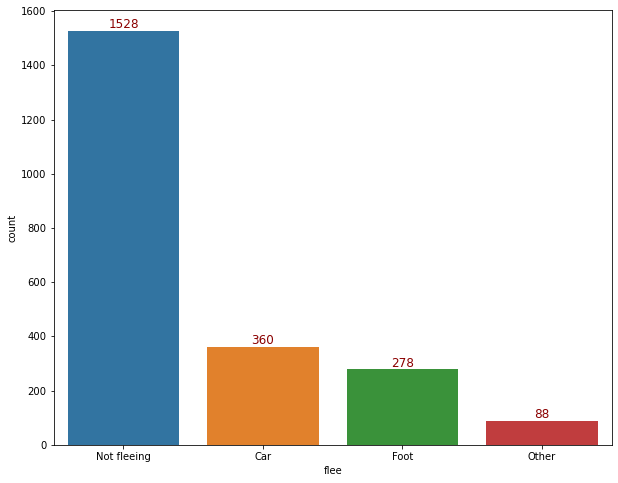

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(kill.flee)

ax.bar_label(ax.containers[0], color = "darkred", size = 12);

# By Gender

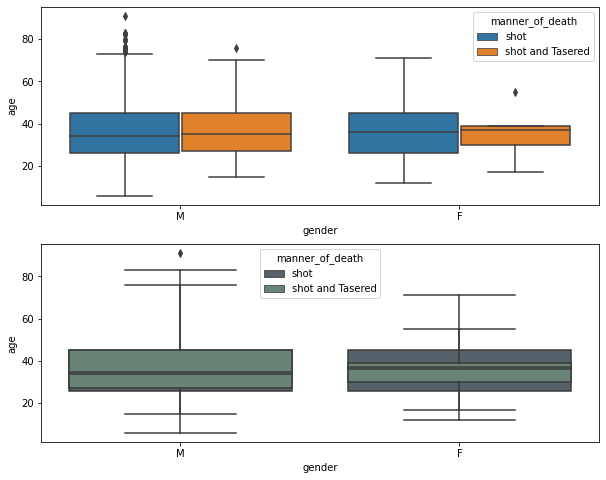

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))  

sns.boxplot(x = kill.gender, y = kill.age, hue=kill.manner_of_death, ax=ax1) 

sns.boxplot(x = kill.gender, y = kill.age, hue=kill.manner_of_death, 
            # color="r",  
            palette = "viridis",  
            saturation=0.2, 
            width = 0.8,  
            whis = 2,   
            dodge = False, 
            ax=ax2);